# Breast Cancer categorization - Linear Regression and Logistic Regression

##  先使用线性回归：将数据在10维上使用梯度下降算法，在可视化时使用PCA降维

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline  

In [4]:
data = np.loadtxt('breast-cancer.txt', delimiter='\t')
# X = np.c_[data[:,0], np.ones(data.shape[0]), data[:, 1:]]
# Omit the UID column, focus on 10 attributes.
X = np.c_[np.ones(data.shape[0]), data[:, 1:]]
print X.shape, type(X)

labelData = np.loadtxt('breast-cancerlabel.txt')
Y = np.c_[labelData]
print Y.size

(683, 10) <type 'numpy.ndarray'>
683


In [5]:
# 计算损失函数
def computeLoss(X, Y, theta=np.zeros((10, 1))):
    m = Y.size
    J = 0
    H = X.dot(theta)
    J = 1.0/(2*m)*(np.sum(np.square(H-Y)))
    
    return J

In [6]:
computeLoss(X, Y)

1.4751098096632504

In [7]:
# 梯度下降
def gradientDescent(X, Y, theta=np.zeros((10, 1)), alpha=0.01, num_iters=1500):
    m = Y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        H = X.dot(theta)
        theta = theta - alpha*(1.0/m)*(X.T.dot(H-Y))
        J_history[iter] = computeLoss(X, Y, theta)
    
    return (theta, J_history)

('Theta: ', array([ 2.1187423 , -0.01861011, -0.03593986, -0.01596437, -0.00747411,
        0.00633263, -0.04878893, -0.00429646, -0.02183938,  0.0034645 ]))


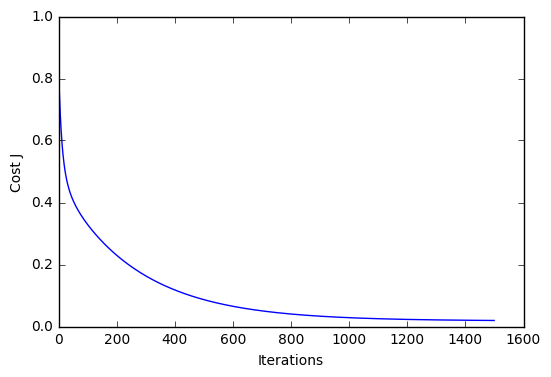

In [8]:
# 观察每一次迭代损失函数的变化
theta, Cost_J = gradientDescent(X, Y)
print("Theta: ", theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations')

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X.T)

print pca.explained_variance_ratio_

vis_data = pca.components_.T

print vis_data.shape

[ 0.41566864  0.14273487]
(683, 2)


683


/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:9: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1
/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 1; dimension is 2 but corresponding boolean dimension is 1


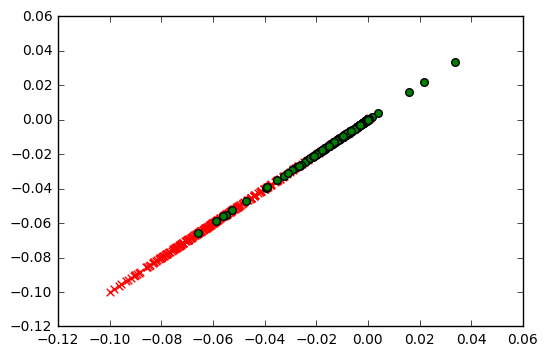

In [16]:
xx = np.arange(-0.1, 0.001, 0.1)
h = X.dot(theta)
print len(h)

# print yy

# # 画出我们自己写的线性回归梯度下降收敛的情况
# plt.plot(xx,yy, label='Linear regression (Gradient descent)')
plt.scatter(vis_data[Y==1][:], vis_data[Y==1][:], s=30, c='r', marker='x', linewidths=1)
plt.scatter(vis_data[Y==2][:], vis_data[Y==2][:], s=30, c='g', marker='o', linewidths=1)
plt.show()

## Visualizing handwritten digits  TSNE 学习过程

In [41]:
import numpy as np
from skdata.mnist.views import OfficialImageClassification
from matplotlib import pyplot as plt
from tsne import bh_sne

In [42]:
# load up data
data = OfficialImageClassification(x_dtype='float32')
x_data = data.all_images
y_data = data.all_labels

In [43]:
# convert image data to float64 matrix. float64 is need for bh_sne
x_data = np.asarray(x_data).astype('float64')
x_data = x_data.reshape((x_data.shape[0], -1))

print x_data.shape

(70000, 784)


In [44]:
# for speed of computation, only run on a subset
n = 20000
x_data = x_data[:n]
y_data = y_data[:n]

In [45]:
# perform t-SNE embedding
vis_data = bh_sne(x_data)
print vis_data.shape

(20000, 2)


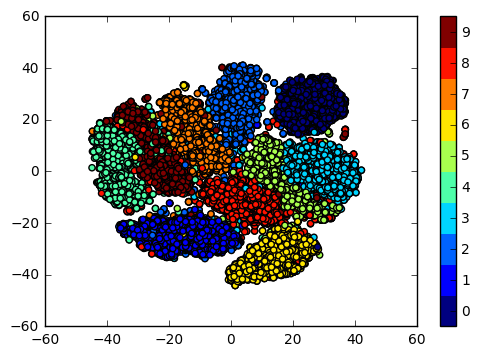

In [46]:
# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

plt.scatter(vis_x, vis_y, c=y_data, cmap=plt.cm.get_cmap('jet', 10))
plt.colorbar(ticks=range(10))
plt.clim(-0.5, 9.5)
plt.show()

## 接下来使用逻辑回归在数据及上测试

In [17]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

from scipy.optimize import minimize

from sklearn.preprocessing import PolynomialFeatures

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [18]:
def loaddata(file, delimeter):
    data = np.loadtxt(file, delimiter=delimeter)
    print('Dimensions: ',data.shape)
    print(data[1:6,:])
    return(data)

In [19]:
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # 获得正负样本的下标(即哪些是正样本，哪些是负样本)
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

In [21]:
data = loaddata('data1.txt', ',')

('Dimensions: ', (100, 3))
[[ 30.28671077  43.89499752   0.        ]
 [ 35.84740877  72.90219803   0.        ]
 [ 60.18259939  86.3085521    1.        ]
 [ 79.03273605  75.34437644   1.        ]
 [ 45.08327748  56.31637178   0.        ]]


In [22]:
X = np.c_[np.ones((data.shape[0],1)), data[:,0:2]]
y = np.c_[data[:,2]]

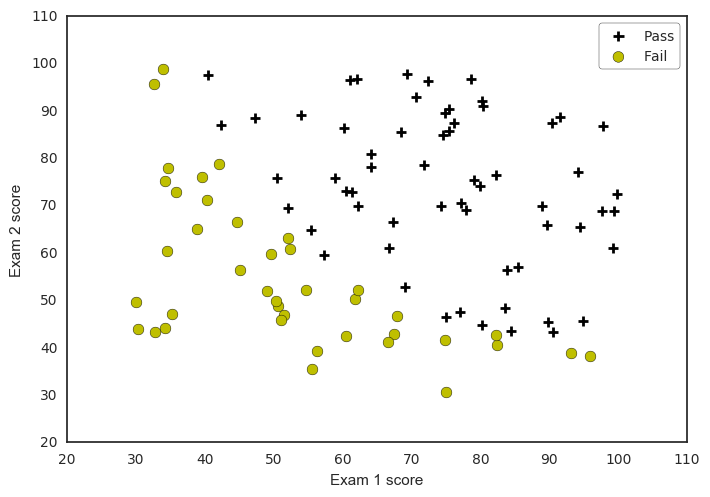

In [23]:
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Pass', 'Fail')

#### 逻辑斯特回归假设
#### $$ h_{\theta}(x) = g(\theta^{T}x)$$
#### $$ g(z)=\frac{1}{1+e^{−z}} $$

In [24]:
#定义sigmoid函数
def sigmoid(z):
    return(1 / (1 + np.exp(-z)))

#### 损失函数
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$
#### 向量化的损失函数(矩阵形式)
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big)$$

In [25]:
#定义损失函数
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y))
               
    if np.isnan(J[0]):
        return(np.inf)
    return J[0]

#### 求偏导(梯度)

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 
#### 向量化的偏导(梯度)
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y)$$

In [26]:
#求解梯度
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1.0/m)*X.T.dot(h-y)

    return(grad.flatten())

In [27]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad)

('Cost: \n', 0.69314718055994529)
('Grad: \n', array([ -0.1       , -12.00921659, -11.26284221]))


**最小化损失函数**

In [28]:
res = minimize(costFunction, initial_theta, args=(X,y), jac=gradient, options={'maxiter':400})
res

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: RuntimeWarning: divide by zero encountered in log


      fun: 0.20349770158950983
 hess_inv: array([[  2.85339493e+03,  -2.32908823e+01,  -2.27416470e+01],
       [ -2.32908823e+01,   2.04489131e-01,   1.72969525e-01],
       [ -2.27416470e+01,   1.72969525e-01,   1.96170322e-01]])
      jac: array([ -2.68557645e-09,   4.36433471e-07,  -1.39671759e-06])
  message: 'Optimization terminated successfully.'
     nfev: 34
      nit: 25
     njev: 30
   status: 0
  success: True
        x: array([-25.16131634,   0.2062316 ,   0.20147143])

In [30]:
def predict(theta, X, threshold=0.5):
    p = sigmoid(X.dot(theta.T)) >= threshold
    return(p.astype('int'))

In [31]:
sigmoid(np.array([1, 45, 85]).dot(res.x.T))   # 样本点测试

0.77629032493310146

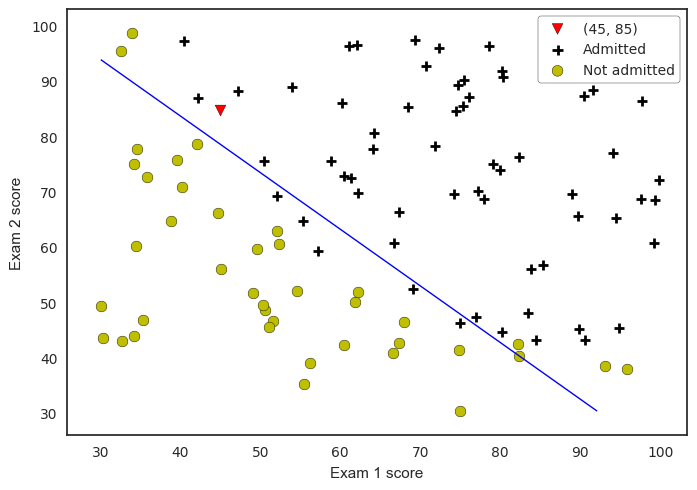

In [32]:
# 画出决策边界
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b');

**加上正则化项**

In [34]:
data2 = loaddata('data2.txt', ',')

('Dimensions: ', (118, 3))
[[-0.092742  0.68494   1.      ]
 [-0.21371   0.69225   1.      ]
 [-0.375     0.50219   1.      ]
 [-0.51325   0.46564   1.      ]
 [-0.52477   0.2098    1.      ]]


In [35]:
# 拿到X和y
y = np.c_[data2[:,2]]
X = data2[:,0:2]

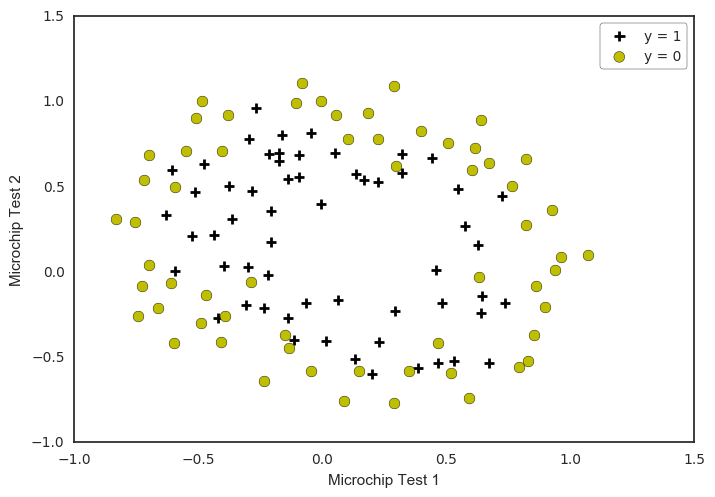

In [36]:
plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

In [37]:
# 设计一些多项式特征
poly = PolynomialFeatures(6)
XX = poly.fit_transform(data2[:,0:2])
# 看看形状(特征映射后x有多少维了)
XX.shape

(118, 28)

#### 正则化后损失函数
#### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$
#### 向量化的损失函数(矩阵形式)
#### $$ J(\theta) = \frac{1}{m}\big((\,log\,(g(X\theta))^Ty+(\,log\,(1-g(X\theta))^T(1-y)\big) + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$

In [38]:
# 定义损失函数
def costFunctionReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta))
    
    J = -1.0*(1.0/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)) + (reg/(2.0*m))*np.sum(np.square(theta[1:]))
    
    if np.isnan(J[0]):
        return(np.inf)
    return(J[0])

#### 偏导(梯度)

#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 
#### 向量化的偏导(梯度)
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m} X^T(g(X\theta)-y) + \frac{\lambda}{m}\theta_{j}$$
##### $$\text{注意，我们另外自己加的参数 } \theta_{0} \text{ 不需要被正则化}$$

In [39]:
def gradientReg(theta, reg, *args):
    m = y.size
    h = sigmoid(XX.dot(theta.reshape(-1,1)))
      
    grad = (1.0/m)*XX.T.dot(h-y) + (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [40]:
initial_theta = np.zeros(XX.shape[1])
costFunctionReg(initial_theta, 1, XX, y)

0.69314718055994529

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: RuntimeWarning: overflow encountered in exp
  app.launch_new_instance()


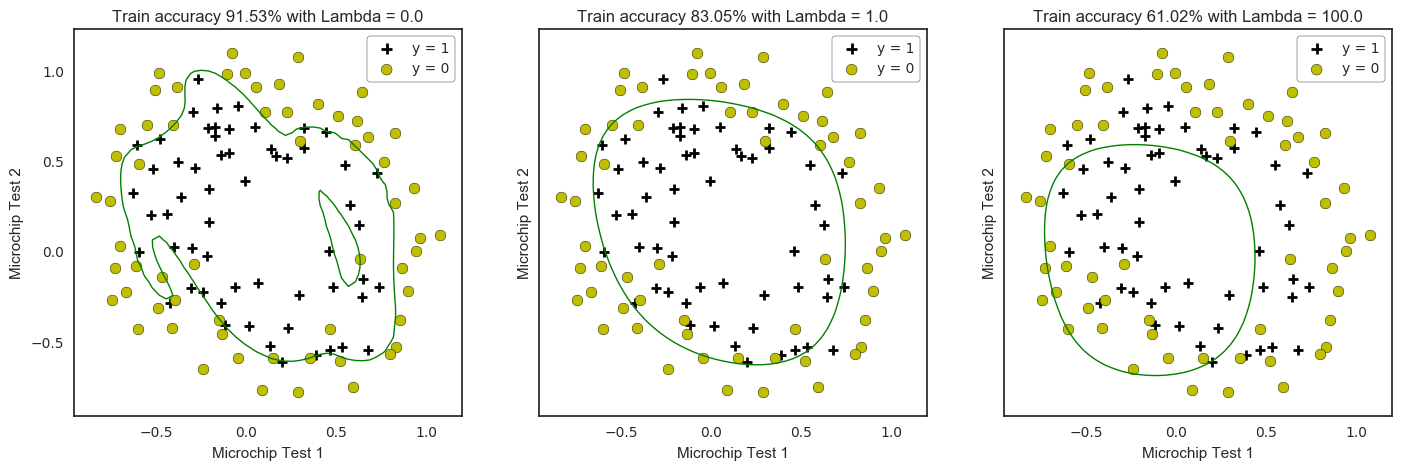

In [41]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# 决策边界，分别来看看正则化系数lambda太大太小分别会出现什么情况
# Lambda = 0 : 就是没有正则化，这样的话，就过拟合咯
# Lambda = 1 : 这才是正确的打开方式
# Lambda = 100 : 正则化项太激进，导致基本就没拟合出决策边界

for i, C in enumerate([0.0, 1.0, 100.0]):
    # 最优化 costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(C, XX, y), jac=gradientReg, options={'maxiter':3000})
    
    # 准确率
    accuracy = 100.0*sum(predict(res2.x, XX) == y.ravel())/y.size    

    # 对X,y的散列绘图
    plotData(data2, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # 画出决策边界
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(poly.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))